<a href="https://colab.research.google.com/github/ashishar/q_character/blob/main/Devanagari_with_qnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# !pip install torchvision
# !pip install qiskit-machine-learning
import importlib

# Check if torchvision is installed
try:
    importlib.import_module('torchvision')
    print("torchvision is already installed.")
except ImportError:
    print("torchvision is not installed. Installing...")
    # Install torchvision using pip
    try:
        import pip
        pip.main(['install', 'torchvision'])
        print("torchvision installed successfully.")
    except Exception as e:
        print("Error occurred while installing torchvision:", str(e))

# try:
#     importlib.import_module('qiskit')
#     print("qiskit is already installed.")
# except ImportError:
#     print("qiskit is not installed. Installing...")
#     # Install torchvision using pip
#     try:
#         import pip
#         pip.main(['install', 'qiskit'])
#         print("qiskit installed successfully.")
#     except Exception as e:
#         print("Error occurred while installing qiskit:", str(e))

# try:
#     importlib.import_module('qiskit_machine_learning')
#     print("qiskit-machine-learning is already installed.")
# except ImportError:
#     print("qiskit-machine-learning is not installed. Installing...")
#     # Install torchvision using pip
#     try:
#         import pip
#         pip.main(['install', 'qiskit-machine-learning'])
#         print("qiskit-machine-learning installed successfully.")
#     except Exception as e:
#         print("Error occurred while installing qiskit-machine-learning:", str(e))


torchvision is already installed.


In [80]:
from google.colab import drive
drive.mount('/content/drive')

# Change directory to the desired location where the file is stored.
%cd /content/drive/MyDrive/

# Import the file named quantum_circuit_simulator.py
import quantum_circuit_simulator


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [68]:
# prompt: I want to download devanagari character dataset from Kaggle.

#!pip install kaggle
#!mkdir -p ~/.kaggle
#!cp /content/drive/MyDrive/devanagari/kaggle.json ~/.kaggle/kaggle.json
#!kaggle datasets download --force -d rishianand/devanagari-character-set
!unzip "/content/drive/My Drive/devanagari-character-set.zip" -d "/content/data"

Archive:  /content/drive/My Drive/devanagari-character-set.zip
replace /content/data/Images/Images/character_01_ka/10962.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [69]:
!pip install Pillow

def crop_images(dataset):
    # Calculating start and end indices for the crop
    start = (32 - 28) // 2  # (32 - 28) / 2 = 2
    end = start + 28  # 2 + 28 = 30

    # Cropping to get 28x28 images
    # dataset[:, start:end, start:end] would be the sliced tensor
    return dataset[:, start:end, start:end]

In [94]:
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Subset
from torch.utils.data import DataLoader, random_split, Subset
from torchvision import transforms
from torch import nn

# Load the CSV file
data = pd.read_csv('/content/data/data.csv')

# Convert all columns to numeric, coercing errors and handling non-numeric data
#data = data.apply(pd.to_numeric, errors='coerce')


# Fill NaN values with 0 (consider other strategies depending on your context)
#data = data.fillna(0)

# Assume images are 28x28 pixels, update this based on your actual image dimensions
image_height = 32
image_width = 32

# Separate features and labels
features = data.iloc[:, :-1]  # All rows, all columns except the last one
features.head()
# column_sums = features.sum()
# print(column_sums)

# Fill missing values if any
#features = features.fillna(0)

features_images = features.values.reshape(-1, 32, 32)
labels = data.iloc[:, -1]     # All rows, only the last column

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


# Convert to PyTorch tensors
features_tensor = torch.tensor(features_images, dtype=torch.float32)
# Cropping the images
cropped_features_tensor = crop_images(features_tensor)

labels_tensor = torch.tensor(labels_encoded, dtype=torch.long)

print("cropped features", cropped_features_tensor.shape)
# Resize all images
#resized_images = torch.stack([resize_image(img) for img in features_tensor])
#resized_images_squeezed=resized_images.squeeze(1)
#print("resized_tensor", resized_images_squeezed.shape)

# Convert DataFrame to PyTorch tensors
# features_tensor = torch.tensor(features.values, dtype=torch.float32)
# labels_tensor = torch.tensor(labels.values, dtype=torch.long)

# Create a TensorDataset to be used with a DataLoader
dataset = TensorDataset(cropped_features_tensor, labels_tensor)

# Generate a random permutation of indices and select the first 1000
indices = torch.randperm(len(dataset))[:1000]

# Create a subset with these indices
subset = Subset(dataset, indices)

# Split the subset into training and testing datasets (80-20 split)
num_train = int(0.7 * len(subset))  # 80% for training
num_test = len(subset) - num_train  # Remaining 20% for testing

train_dataset, test_dataset = random_split(subset, [num_train, num_test])
# def reshape_dataset(dataset, new_shape):
#     reshaped_features = [features.view(new_shape) for features, _ in dataset]
#     labels = [labels for _, labels in dataset]
#     features_tensor = torch.stack(reshaped_features)
#     labels_tensor = torch.stack(labels)
#     return TensorDataset(features_tensor, labels_tensor)

# # Reshape the datasets to 32x32
# train_dataset_reshaped = reshape_dataset(train_dataset, (-1, 32, 32))
# test_dataset_reshaped = reshape_dataset(test_dataset, (-1, 32, 32))

# Create DataLoaders for train and test sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

# Example usage
# for features, labels in train_loader:
#     # Training loop code here
#     print("Training batch features:", features.size())
#     print("Training batch labels:", labels.size())

# for features, labels in test_loader:
#     # Testing loop code here
    # print("Testing batch features:", features.size())
    # print("Testing batch labels:", labels.size())

# Create a DataLoader to handle batching
#dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

cropped features torch.Size([92000, 28, 28])


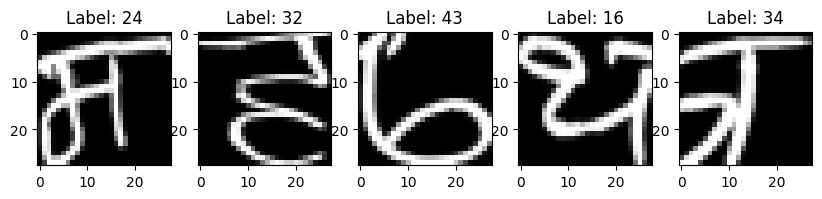

In [95]:
# Plotting function
def plot_images(images, labels, num_images=5):
  fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
  for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Label: {labels[i]}')
    ax.axis('on')
  plt.show()

# Display the first 5 images and labels
for features, labels in train_loader:
  plot_images(features, labels, 5)
  break  # Only process the first batch#


In [96]:
for features, labels in train_loader:
  print(features.shape)

torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([60, 28, 28])


In [97]:
from torch.utils.data import TensorDataset
from IPython.display import display, clear_output
import time


def plot_images_by_label(dataloader, specific_label, num_images=5):
    count = 0  # Counter to track how many images we have displayed
    plt.figure(figsize=(10, 2))  # Set up the figure size

    for images, labels in dataloader:
        for image, label in zip(images, labels):
            if label.item() == specific_label:  # Check if the label matches
                count += 1
                ax = plt.subplot(1, num_images, count)  # Create a subplot for each image
                ax.imshow(image.squeeze(), cmap='gray')  # Display image, squeeze() is used to remove extra dimensions if any
                ax.title.set_text(f'Label: {label.item()}')
                ax.axis('on')  # Turn off axis

                if count == num_images:  # Only display a specific number of images
                    plt.show()
                    return
# Example usage
# Assuming your DataLoader, images, and labels are properly set up
# Here you call the function with the label you want to display and the number of images

for i in range(2):
  plot_images_by_label(train_loader, specific_label=i, num_images=5)# Call the function with the desired label
  clear_output(wait=True)  # Clear the current output and wait for new output
  time.sleep(0.01)  # Pause for a second to simulate time taken in an iteration



KeyboardInterrupt: 

In [101]:
device = "cuda" if torch.cuda.is_available() else "cpu"    # Get gpu or cpu device for training
print(f"Using {device} device\n")

import torchvision.transforms.functional as TF
from skimage.feature import hog
from quantum_circuit_simulator import quantum_circuit


# Define a function to compute HOG features for an image
def compute_hog_features(image):
    features, _ = hog(image, orientations=10, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

    return features

#=====================================================================================


class QNN(torch.nn.Module):                              # Define model
    def __init__(self, n, L):                            # number of qubits = n, number of quantum layers = L
        super().__init__()

        self.flatten = nn.Flatten()

        angles = torch.empty((L, n), dtype=torch.float64)
        torch.nn.init.uniform_(angles, -0.01, 0.01)
        self.angles = torch.nn.Parameter(angles)                   # it makes angles learnable parameters

        # self.fc1 = nn.Linear(1024, 1024)
        # self.fc2 = nn.Linear(784,512)
        # self.fc3 = nn.Linear(512, 1024)

        self.linear = nn.Linear(2**n, 46)                          # classical linear layer


    def forward(self, x):
        #x = F.pad(x, (2 ,2, 2, 2), "constant", 0)                  # (left, right, top, bottom) padding
        x_projection = torch.sum(x, dim=1).to(device)  # Calculate x-axis projection
        #x_projection = x_projection / torch.norm(x_projection, p=1)
        y_projection = torch.sum(x, dim=2).to(device)  # Calculate x-axis projection
        #y_projection = y_projection / torch.norm(y_projection, p=1)
        #angle projection
        rotated_images1 = TF.rotate(x,30).to(device)
        rotated_images2 = TF.rotate(x,45).to(device)
        rotated_images3 = TF.rotate(x,60).to(device)

        #rotated projections
        rotated_projection1=torch.sum(rotated_images1, dim=2).to(device)
        rotated_projection2=torch.sum(rotated_images2, dim=2).to(device)
        rotated_projection3=torch.sum(rotated_images3, dim=2).to(device)

        #rotated_images = torch.sum(torch.stack([TF.rotate(img, angle) for img in inputs]))
        x_image=x.cpu().numpy()
        hog_features = [compute_hog_features(np.squeeze(image)) for image in x_image]
        hog_features_tensor = torch.tensor(np.array(hog_features), dtype=torch.float32).to(device)
        #print(hog_features_tensor.shape)

        x = self.flatten(x)
        x = x[:, :-32]

        # print("sizes ",x.shape, y_projection.shape, rotated_projection1.shape,rotated_projection2.shape,
        #      rotated_projection3.shape,hog_features_tensor.shape)

        combined_projection=torch.cat((x,y_projection.squeeze(), rotated_projection1.squeeze(),rotated_projection2.squeeze(),rotated_projection3.squeeze(),hog_features_tensor), dim=1)

        #print("combined ", combined_projection.shape)
        #x = self.flatten(x)
        combined_projection /= torch.linalg.norm(x.clone(), ord=2, dim=1, keepdim=True)   # L2 normalization to change x --> |x⟩

        # combined_projection = torch.sigmoid(self.fc1(combined_projection))
        # x1 = torch.sigmoid(self.fc2(x1))
        # x1 = torch.sigmoid(self.fc3(x1))

        '''initializing parameterized quantum circuits (PQC)'''

        qc = quantum_circuit(num_qubits = n, state_vector = combined_projection.T)   # each column is a feature-vector of an example
        for l in range(L):
            qc.Ry_layer(self.angles[l].to(torch.cfloat))           # rotation part of lth quantum layer
            qc.cx_linear_layer()                                   # entangling part of lth quantum layer

        'after passing through the PQC, measurement on the output-ket in the computational basis'
        x = torch.real(qc.probabilities())               # each column is a probabilities-vector for an example
                                                         # x.shape = (dim, batch size)

        #print(torch.sum(x, dim=0))                      # to see whether probabilities add up to 1 or not

        x = self.linear(x.T)                             # x.shape = (batch size, 10),  classical linear layer

        return x

Using cpu device



In [102]:
def performance_estimate(dataset, model, loss_fn, train_or_test):
    '''this function computes accuracy and loss of a model on the training or test set'''
    data_size = len(dataset)

    dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
    num_batches = len(dataloader)

    model.eval()
    loss, accuracy = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            accuracy += (pred.argmax(1) == y).sum().item()
            loss += loss_fn(pred, y).item()
    accuracy /= data_size                                            # accuracy lies in the interval [0, 1]
    loss /= num_batches
    print(f"{train_or_test} accuracy: {round(accuracy, 3)},  {train_or_test} loss: {round(loss,3)}")
    return accuracy, loss




def one_epoch(model, loss_fn, optimizer, train_dataset, test_dataset, batch_size):

    A_train, L_train, A_test, L_test = [], [], [], []

    dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        out = model(X)                             # Perform a single forward pass
        loss = loss_fn(out, y)

        optimizer.zero_grad()                      # Clear gradients
        loss.backward()                            # Derive gradients, backpropagation
        optimizer.step()                           # Update parameters based on gradients


        if batch % batch_size == 0:
            #As training progress, computing and appending loss and accuracy of the model on train and test set
            accuracy_train, loss_train = performance_estimate(train_dataset, model, loss_fn, 'train')
            accuracy_test, loss_test = performance_estimate(test_dataset, model, loss_fn, 'test ')
            print()

            A_train.append(accuracy_train)
            L_train.append(loss_train)
            A_test.append(accuracy_test)
            L_test.append(loss_test)

            #print(f"train loss: {round(loss,3)}")

    return A_train, L_train, A_test, L_test



def training(train_dataset, test_dataset, batch_size, n, L, lr_, weight_decay_, epochs):

    model = QNN(n=n, L=L).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_, weight_decay=weight_decay_)

    A_Train, L_Train, A_Test, L_Test = [], [], [], []
    for t in range(epochs):
        print(f"Epoch {t+1} ---------------------------------- \n")
        #As training progress, computing and appending loss and accuracy of the model on train and test set
        A_train, L_train, A_test, L_test = one_epoch(model, loss_fn, optimizer, train_dataset, test_dataset, batch_size)
        A_Train += A_train
        L_Train += L_train
        A_Test += A_test
        L_Test += L_test

        #accuracy, loss = performance_estimate(test_dataset, model, loss_fn, 'test ')

    model_state_dict = model.state_dict()           # for saving or loading the trained model

    return A_Train, L_Train, A_Test, L_Test, model_state_dict

In [ ]:
%%time

n = 10
dim = 2**n              # dimension of the n-qubit Hilbert space
L = 2

n_angs = n*L

print("number of qubits = ", n)
print("number of quantum layers = ", L)
print(f"number of angles (learnable parameters of quantum circuit) = {n_angs}\n ")

#--------------------------------------------------------------------------------------


batch_size = 64
print(f'batch_size = {batch_size}\n')


#----------------------------------------------------------------------------------


A_Train, L_Train, A_Test, L_Test, model_state_dict = training(train_dataset, test_dataset, batch_size=batch_size, n=n, L=L,
                                                              lr_=0.01, weight_decay_=1e-10, epochs=30)


print(f' ~~~~~ training is done ~~~~~\n')

number of qubits =  10
number of quantum layers =  2
number of angles (learnable parameters of quantum circuit) = 20
 
batch_size = 64

Epoch 1 ---------------------------------- 

train accuracy: 0.031,  train loss: 3.788
test  accuracy: 0.04,  test  loss: 3.822

Epoch 2 ---------------------------------- 

train accuracy: 0.274,  train loss: 3.108
test  accuracy: 0.24,  test  loss: 3.325

Epoch 3 ---------------------------------- 

train accuracy: 0.507,  train loss: 2.606


In [ ]:
plt.plot(A_Train, label='train set')
plt.plot(A_Test, label='test set')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(L_Train, label='train set')
plt.plot(L_Test, label='test set')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
idx = np.random.choice(len(test_dataset))

x = test_dataset[idx][0]
print(f'x of {x.shape} :')
plt.imshow(x[0], cmap='gray')
plt.show()

print(f'true label = y = {test_dataset[idx][1]}\n')


out_ = model(x.view(1, 1, 28, 28)).detach().flatten()
prob = F.softmax(out_, dim=0)
pred = prob.argmax().item()
print(f'predicted label = {pred}\n')

plt.stem(np.arange(10), prob)
plt.ylabel('probability')
plt.xlabel('class labels')
plt.show()

In [ ]:
784+28*5+144